In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
from scipy import stats
import seaborn as sns
plt.rcParams['font.size'] = 18
#plt.rcParams['font.family'] = "serif"
tdir = 'in'
major = 5.0
minor = 3.0
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor

In [8]:
def results_dict(lines, val):
    results = {'2018-01': [], '2018-02': [], '2018-03': [], '2018-04': [],
               '2018-05': [],'2018-06': [],'2018-07': [],'2018-08': [],
               '2018-09': [],'2018-10': [],'2018-11': [],'2018-12': []}
    
    if val == 'acc':
        ind = 3
    if val == 'rocauc':
        ind = 4
    if val == 'trtime':
        ind = 2
    if val == 'epoch':
        ind = 1
        
    for line in lines:
        l = line.split('\t')
        results[l[0]] += [float(l[ind])]
            
    res = [v for k, v in results.items()]
    res_mean_ = np.array([np.mean(v) for v in res])
    res_std_ = np.array([np.std(v) for v in res])    
    
    return res, res_mean_, res_std_

def get_plot_data(results_dir, replay_sample):
    
    if results_dir == './pjr_with_random_buffer_results/':
        results_file = results_dir + 'PJR_replay_' + str(replay_sample) +\
                        '/results_accumulated_replay_' + str(replay_sample) + '_results.txt'

    else:
        results_file = results_dir + str(replay_sample) + '_results.txt'
        #balanced_results_accumulated_replay_500_results.txt
        
    print(results_file)
    with open(results_file) as f:
        lines = f.readlines()
        acc, acc_mean, acc_std = results_dict(lines, 'acc')
        rocauc, rocauc_mean, rocauc_std = results_dict(lines, 'rocauc')
        trtime, trtime_mean, trtime_std = results_dict(lines, 'trtime')
        epochs, epochs_mean, epochs_std = results_dict(lines, 'epoch')
    
    
    print(f'Replay {replay_sample} mean {np.mean(acc_mean) * 100:.2f}\u00B1{np.std(acc_mean) * 100:.2f} Minimum {np.mean(acc_mean[0])* 100:.2f}\u00B1{np.std(acc_mean[0])* 100:.2f}')
    print()
    return acc, acc_mean


joint_accs, joint_accs_mean =\
    get_plot_data('./pjr_with_random_buffer_results/', 1.0)


fivehundred_acc, fivehundred_acc_mean =\
    get_plot_data('./saved_results/NEW_PJR_replay_500/results_accumulated_replay_', 500)

ifs_1_acc, ifs_1_acc_mean =\
    get_plot_data('./IFS_Results/IFS_0.1_500/IFS_', 500)

#if_new, if_mean =\
#    get_plot_data('./IFBased_saved_results_ifbased_/IFBased_PJR_replay_500/next_2_recheck_', 500)


f_fc, f_fc_mean =\
    get_plot_data('./Weights_results_weights/Weights_replay_500/fc4_weight_final_fc4_', 500)

f_fcbn, f_fcbn_mean =\
    get_plot_data('./Weights_results_weights/Weights_replay_500/fc4_bn_weight_final_fcbn4_', 500)

f_act, f_act_mean =\
    get_plot_data('./Weights_results_weights/Weights_replay_500/act4_weight_final_act4_', 500)


fwo_fc, fwo_fc_mean =\
    get_plot_data('./Weights_results_weights/Weights_replay_500/fc4_weight_wobn_fc4_', 500)

fwo_act, fwo_act_mean =\
    get_plot_data('./Weights_results_weights/Weights_replay_500/act4_weight_wobn_fc4_', 500)


# none_accs, none_accs_mean =\
#             get_plot_data('./pjr_with_random_buffer_results/', 0.0)


# fwo_act_limit, fwo_act_limit_mean =\
#     get_plot_data('./Weights_results_weights/Weights_replay_500/act4_weight_final_scoreLimit_WOBN_act4_', 500)


# fwo_cntauto, fwo_cntauto_m =\
#         get_plot_data('./Weights_results_weights/Weights_replay_500/act4_weight_wobn_auto_', 500)

# fwo_cnt20, fwo_cnt20_m =\
#         get_plot_data('./Weights_results_weights/Weights_replay_500/act4_weight_wobn_0.2_', 500)

# fwo_cnt30, fwo_cnt30_m =\
#         get_plot_data('./Weights_results_weights/Weights_replay_500/act4_weight_wobn_0.3_', 500)

# fwo_cnt40, fwo_cnt40_m =\
#         get_plot_data('./Weights_results_weights/Weights_replay_500/act4_weight_wobn_0.4_', 500)


# fwo_cnt50, fwo_cnt50_m =\
#         get_plot_data('./Weights_results_weights/Weights_replay_500/act4_weight_wobn_0.5_', 500)


print()
print()
# print(f'0%                 : {np.mean(none_accs_mean):.4f} \u00B1 {np.std(none_accs_mean):.4f}')
print(f'FRS-500/f          : {np.mean(fivehundred_acc_mean):.4f} \u00B1 {np.std(fivehundred_acc_mean):.4f}')
print(f'IFS-500/f          : {np.mean(ifs_1_acc_mean):.4f} \u00B1 {np.std(ifs_1_acc_mean):.4f}')
print()
print(f'Weight-FC          : {np.mean(f_fc_mean):.4f} \u00B1 {np.std(f_fc_mean):.4f}')
print(f'Weight-FC-BN       : {np.mean(f_fcbn_mean):.4f} \u00B1 {np.std(f_fcbn_mean):.4f}')
print(f'Weight-Act         : {np.mean(f_act_mean):.4f} \u00B1 {np.std(f_act_mean):.4f}')
print()
print(f'Weight-WOBN-FC     : {np.mean(fwo_fc_mean):.4f} \u00B1 {np.std(fwo_fc_mean):.4f}')
print(f'Weight-WOBN-Act    : {np.mean(fwo_act_mean):.4f} \u00B1 {np.std(fwo_act_mean):.4f}')

print(f'100%               : {np.mean(joint_accs_mean):.4f} \u00B1 {np.std(joint_accs_mean):.4f}')

print()
# print(f'Weight-WOBN-Limit-Act    : {np.mean(fwo_act_limit_mean):.4f} \u00B1 {np.std(fwo_act_limit_mean):.4f}')

# print()

# print(f'WO-Cnt-auto         : {np.mean(fwo_cntauto_m):.4f} \u00B1 {np.std(fwo_cntauto_m):.4f}')
# print(f'WO-Cnt-20           : {np.mean(fwo_cnt20_m):.4f} \u00B1 {np.std(fwo_cnt20_m):.4f}')
# print(f'WO-Cnt-30           : {np.mean(fwo_cnt30_m):.4f} \u00B1 {np.std(fwo_cnt30_m):.4f}')
# print(f'WO-Cnt-40           : {np.mean(fwo_cnt40_m):.4f} \u00B1 {np.std(fwo_cnt40_m):.4f}')
# print(f'WO-Cnt-50           : {np.mean(fwo_cnt50_m):.4f} \u00B1 {np.std(fwo_cnt50_m):.4f}')


./pjr_with_random_buffer_results/PJR_replay_1.0/results_accumulated_replay_1.0_results.txt
Replay 1.0 mean 95.87±0.89 Minimum 93.72±0.00

./saved_results/NEW_PJR_replay_500/results_accumulated_replay_500_results.txt
Replay 500 mean 95.14±0.98 Minimum 92.55±0.00

./IFS_Results/IFS_0.1_500/IFS_500_results.txt
Replay 500 mean 96.05±0.86 Minimum 93.56±0.00

./Weights_results_weights/Weights_replay_500/fc4_weight_final_fc4_500_results.txt
Replay 500 mean 96.04±0.79 Minimum 94.01±0.00

./Weights_results_weights/Weights_replay_500/fc4_bn_weight_final_fcbn4_500_results.txt
Replay 500 mean 96.16±0.78 Minimum 94.00±0.00

./Weights_results_weights/Weights_replay_500/act4_weight_final_act4_500_results.txt
Replay 500 mean 96.05±0.99 Minimum 93.29±0.00

./Weights_results_weights/Weights_replay_500/fc4_weight_wobn_fc4_500_results.txt
Replay 500 mean 96.15±0.76 Minimum 94.08±0.00

./Weights_results_weights/Weights_replay_500/act4_weight_wobn_fc4_500_results.txt
Replay 500 mean 96.26±0.71 Minimum 94.51

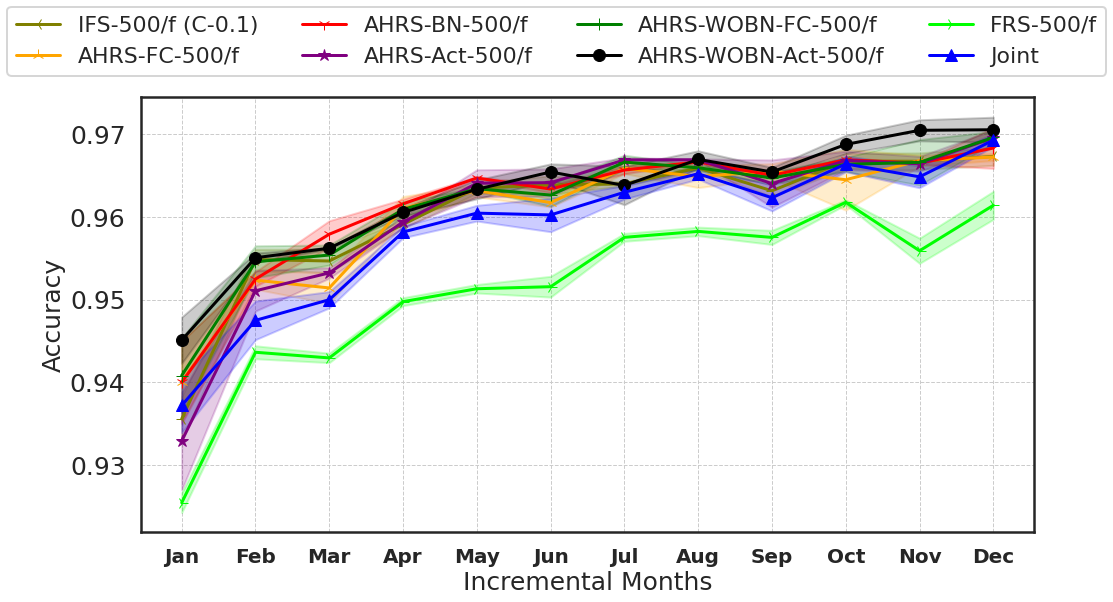

In [10]:

sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
palette = sns.color_palette("bright")


save_file_rocauc = 'AHRS.png'

x_axis = np.array([i for i in range(12)])

plt.figure(figsize=(16, 8))


#none_sem = [stats.sem(none_accs[i]) for i in range(len(none_accs))]
#plt.fill_between(x_axis + [1], none_accs_mean-none_sem, none_accs_mean+none_sem, color='lime', alpha=0.2)
#plt.plot(x_axis + [1],none_accs_mean, 'lime', marker= 'D', markersize=12, linewidth=3.0)



ifs_1_sem = [stats.sem(ifs_1_acc[i]) for i in range(len(ifs_1_acc))]
plt.fill_between(x_axis + [1],\
    ifs_1_acc_mean-ifs_1_sem, ifs_1_acc_mean+ifs_1_sem, color='olive', alpha=0.2)
plt.plot(x_axis + [1],ifs_1_acc_mean, 'olive',marker= '3', markersize=12, linewidth=3.0, label='IFS-500/f (C-0.1)')



f_fc_sem = [stats.sem(f_fc[i]) for i in range(len(f_fc))]
plt.fill_between(x_axis + [1],\
    f_fc_mean-f_fc_sem, f_fc_mean+f_fc_sem, color='orange', alpha=0.2)
plt.plot(x_axis + [1],f_fc_mean, 'orange',marker= '2', markersize=12, linewidth=3.0, label='AHRS-FC-500/f')


f_fcbn_sem = [stats.sem(f_fcbn[i]) for i in range(len(f_fcbn))]
plt.fill_between(x_axis + [1],\
    f_fcbn_mean-f_fcbn_sem, f_fcbn_mean+f_fcbn_sem, color='red', alpha=0.2)
plt.plot(x_axis + [1],f_fcbn_mean, 'red',marker= '1', markersize=12, linewidth=3.0, label = 'AHRS-BN-500/f')



f_act_sem = [stats.sem(f_act[i]) for i in range(len(f_act))]
plt.fill_between(x_axis + [1],\
    f_act_mean-f_act_sem, f_act_mean+f_act_sem, color='purple', alpha=0.2)
plt.plot(x_axis + [1],f_act_mean, 'purple',marker= '*', markersize=12, linewidth=3.0, label='AHRS-Act-500/f')



fwo_fc_sem = [stats.sem(fwo_fc[i]) for i in range(len(fwo_fc))]
plt.fill_between(x_axis + [1],\
    fwo_fc_mean-fwo_fc_sem, fwo_fc_mean+fwo_fc_sem, color='green', alpha=0.2)
plt.plot(x_axis + [1],fwo_fc_mean, 'green',marker= '+', markersize=12, linewidth=3.0, label='AHRS-WOBN-FC-500/f')


fwo_act_sem = [stats.sem(fwo_act[i]) for i in range(len(fwo_act))]
plt.fill_between(x_axis + [1],\
    fwo_act_mean-fwo_act_sem, fwo_act_mean+fwo_act_sem, color='black', alpha=0.2)
plt.plot(x_axis + [1],fwo_act_mean, 'black',marker= 'o', markersize=12, linewidth=3.0, label='AHRS-WOBN-Act-500/f')



fivehundred_sem = [stats.sem(fivehundred_acc[i]) for i in range(len(fivehundred_acc))]
plt.fill_between(x_axis + [1], fivehundred_acc_mean-fivehundred_sem,\
                 fivehundred_acc_mean+fivehundred_sem, color='lime', alpha=0.2)
plt.plot(x_axis + [1],fivehundred_acc_mean, 'lime',marker= '4', markersize=12, linewidth=3.0, label='FRS-500/f')



joint_sem = [stats.sem(joint_accs[i]) for i in range(len(joint_accs))]
plt.fill_between(x_axis + [1], joint_accs_mean-joint_sem, joint_accs_mean+joint_sem, color='blue', alpha=0.2)
plt.plot(x_axis + [1],joint_accs_mean, 'blue',marker= '^', markersize=12, linewidth=3.0, label='Joint');


plt.legend(ncol=4, loc=(-0.15, 1.05))


plt.ylabel('Accuracy', fontsize=25)
plt.xlabel('Incremental Months', fontsize=25)
plt.xticks([1, 2,3,4,5, 6, 7, 8, 9, 10, 11, 12],\
           ['Jan', 'Feb', 'Mar', 'Apr',\
          'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=20, fontweight ='bold') 
         
plt.yticks(fontsize=25)
plt.grid(True, linestyle='--', linewidth=1.)

plt.savefig('./figs_proposal/' + save_file_rocauc,
                bbox_inches='tight', dpi=300);

In [ ]:
save_file_rocauc = 'PJR_weight_Contamination.pdf'

x_axis = np.array([i for i in range(12)])

plt.figure(figsize=(16, 8))


#none_sem = [stats.sem(none_accs[i]) for i in range(len(none_accs))]
#plt.fill_between(x_axis + [1], none_accs_mean-none_sem, none_accs_mean+none_sem, color='lime', alpha=0.2)
#plt.plot(x_axis + [1],none_accs_mean, 'lime', marker= 'D', markersize=12, linewidth=3.0)



# five00_if_n2_sem = [stats.sem(five00_if_n2[i]) for i in range(len(five00_if_n2))]
# plt.fill_between(x_axis + [1],\
#     five00_if_n2_mean-five00_if_n2_sem, five00_if_n2_mean+five00_if_n2_sem, color='olive', alpha=0.2)
# plt.plot(x_axis + [1],five00_if_n2_mean, 'olive',marker= '3', markersize=12, linewidth=3.0)



fo_cntauto_sem = [stats.sem(fwo_cntauto[i]) for i in range(len(fwo_cntauto))]
plt.fill_between(x_axis + [1],\
    fwo_cntauto_m-fo_cntauto_sem, fwo_cntauto_m+fo_cntauto_sem, color='orange', alpha=0.2)
plt.plot(x_axis + [1],fwo_cntauto_m, 'orange',marker= '2', markersize=12, linewidth=3.0)


fo_cnt20_sem = [stats.sem(fwo_cnt20[i]) for i in range(len(fwo_cnt20))]
plt.fill_between(x_axis + [1],\
    fwo_cnt20_m-fo_cnt20_sem, fwo_cnt20_m+fo_cnt20_sem, color='red', alpha=0.2)
plt.plot(x_axis + [1],fwo_cnt20_m, 'red',marker= '1', markersize=12, linewidth=3.0)



fo_cnt30_sem = [stats.sem(fwo_cnt30[i]) for i in range(len(fwo_cnt30))]
plt.fill_between(x_axis + [1],\
    fwo_cnt30_m-fo_cnt30_sem, fwo_cnt30_m+fo_cnt30_sem, color='purple', alpha=0.2)
plt.plot(x_axis + [1],fwo_cnt30_m, 'purple',marker= '*', markersize=12, linewidth=3.0)


fo_cnt40_sem = [stats.sem(fwo_cnt40[i]) for i in range(len(fwo_cnt40))]
plt.fill_between(x_axis + [1],\
    fwo_cnt40_m-fo_cnt40_sem, fwo_cnt40_m+fo_cnt40_sem, color='olive', alpha=0.2)
plt.plot(x_axis + [1],fwo_cnt40_m, 'olive',marker= '*', markersize=12, linewidth=3.0)



fo_cnt50_sem = [stats.sem(fwo_cnt50[i]) for i in range(len(fwo_cnt50))]
plt.fill_between(x_axis + [1],\
    fwo_cnt50_m-fo_cnt50_sem, fwo_cnt50_m+fo_cnt50_sem, color='green', alpha=0.2)
plt.plot(x_axis + [1],fwo_cnt50_m, 'green',marker= '+', markersize=12, linewidth=3.0)


fwo_act_sem = [stats.sem(fwo_act[i]) for i in range(len(fwo_act))]
plt.fill_between(x_axis + [1],\
    fwo_act_mean-fwo_act_sem, fwo_act_mean+fwo_act_sem, color='black', alpha=0.2)
plt.plot(x_axis + [1],fwo_act_mean, 'black',marker= 'o', markersize=12, linewidth=3.0)



joint_sem = [stats.sem(joint_accs[i]) for i in range(len(joint_accs))]
plt.fill_between(x_axis + [1], joint_accs_mean-joint_sem, joint_accs_mean+joint_sem, color='blue', alpha=0.2)
plt.plot(x_axis + [1],joint_accs_mean, 'blue',marker= '^', markersize=12, linewidth=3.0);


plt.legend(
           ['WOBN-Act-Cnt auto', 'WOBN-Act-Cnt 0.2', 'WOBN-Act-Cnt 0.3', 'WOBN-Act-Cnt 0.4',\
            'WOBN-Act-Cnt 0.5', 'Weight-WOBN-Act', 'Joint'],\
          ncol=4, loc=(0.005, 1.05))


plt.ylabel('Accuracy', fontsize=25)
plt.xlabel('Incremental Months', fontsize=25)
plt.xticks([1, 2,3,4,5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr',\
              'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=25) 
plt.yticks(fontsize=25)
plt.grid(True, linestyle='--', linewidth=1.)

plt.savefig('./figures_weights/' + save_file_rocauc, bbox_inches='tight', transparent=True, dpi=600);